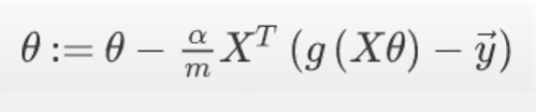

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
data = {'name': ['ahmad', 'hamed', 'mona', 'syd', 'lbna'],
        'Weight': [70, 88, 91, 65, 79],
        'age': [18, 22, 38, 21, 25],
        'Anemia': [1, 0, 0, 1, 1],
        'sick': [1, 1, 1, 0, 0]}
df = pd.DataFrame(data)
df 

,name,Weight,age,Anemia,sick
0,ahmad,70,18,1,1
1,hamed,88,22,0,1
2,mona,91,38,0,1
3,syd,65,21,1,0
4,lbna,79,25,1,0


In [92]:
df.shape

(5, 5)

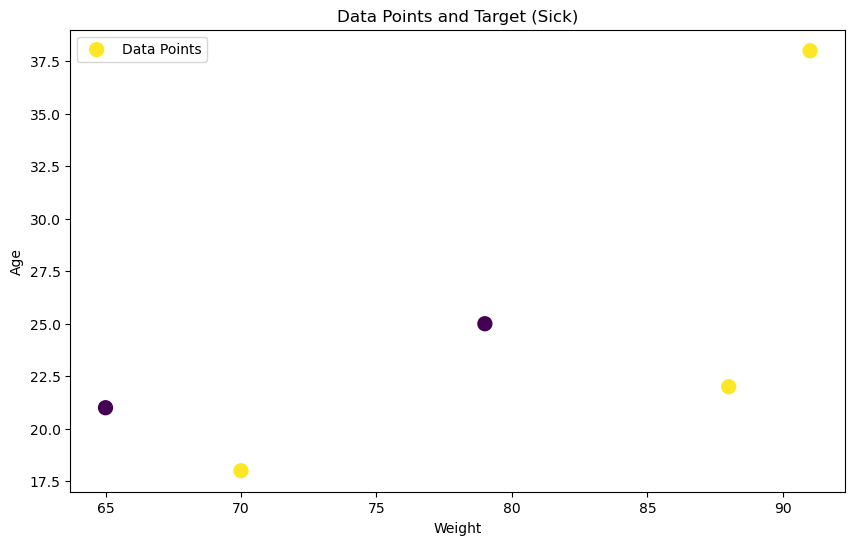

In [93]:
# Scatter plot  
plt.figure(figsize=(10, 6))
plt.scatter(df['Weight'], df['age']  , c=df['sick'], cmap='viridis', s=100, label='Data Points')
plt.title('Data Points and Target (Sick)')
plt.xlabel('Weight')
plt.ylabel('Age')
plt.legend()
plt.show()


In [68]:
# assume the value theta is matrix once 
theta = np.ones((4, 1))
theta

array([[1.],
       [1.],
       [1.],
       [1.]])

In [69]:
y_target = df['sick']
y_target

0    1
1    1
2    1
3    0
4    0
Name: sick, dtype: int64

In [70]:
df = df.drop(["sick"], axis = 1)
df

,name,Weight,age,Anemia
0,ahmad,70,18,1
1,hamed,88,22,0
2,mona,91,38,0
3,syd,65,21,1
4,lbna,79,25,1


In [71]:
df_x0=np.ones((5,1))

In [72]:
df.insert(1, "New_Column", df_x0)

print(df)


    name  New_Column  Weight  age  Anemia
0  ahmad         1.0      70   18       1
1  hamed         1.0      88   22       0
2   mona         1.0      91   38       0
3    syd         1.0      65   21       1
4   lbna         1.0      79   25       1


In [73]:
df= df.rename(columns={'New_Column': 'x0'})
df

,name,x0,Weight,age,Anemia
0,ahmad,1.0,70,18,1
1,hamed,1.0,88,22,0
2,mona,1.0,91,38,0
3,syd,1.0,65,21,1
4,lbna,1.0,79,25,1


In [74]:
x = df.drop(["name"], axis = 1)
x_transpose=x.transpose()
x

,x0,Weight,age,Anemia
0,1.0,70,18,1
1,1.0,88,22,0
2,1.0,91,38,0
3,1.0,65,21,1
4,1.0,79,25,1


In [75]:
x.shape

(5, 4)

In [76]:
x_transpose

,0,1,2,3,4
x0,1.0,1.0,1.0,1.0,1.0
Weight,70.0,88.0,91.0,65.0,79.0
age,18.0,22.0,38.0,21.0,25.0
Anemia,1.0,0.0,0.0,1.0,1.0


In [77]:
print("y_target",y_target)
print("---------------------------------------")
print("theta",theta)
print("---------------------------------------")
print('x',x)
print("---------------------------------------")
print("x_transpose",x_transpose)
print("---------------------------------------")



y_target 0    1
1    1
2    1
3    0
4    0
Name: sick, dtype: int64
---------------------------------------
theta [[1.]
 [1.]
 [1.]
 [1.]]
---------------------------------------
x     x0  Weight  age  Anemia
0  1.0      70   18       1
1  1.0      88   22       0
2  1.0      91   38       0
3  1.0      65   21       1
4  1.0      79   25       1
---------------------------------------
x_transpose            0     1     2     3     4
x0       1.0   1.0   1.0   1.0   1.0
Weight  70.0  88.0  91.0  65.0  79.0
age     18.0  22.0  38.0  21.0  25.0
Anemia   1.0   0.0   0.0   1.0   1.0
---------------------------------------


In [78]:
# the first step 
# theta * x 
theta_dot_x  = np.dot(x, theta)
theta_dot_x

array([[ 90.],
       [111.],
       [130.],
       [ 88.],
       [106.]])

In [79]:
# the second  step 
# theta_dot_x - y_target
result = theta_dot_x - y_target.values.reshape(-1, 1)
result
 

array([[ 89.],
       [110.],
       [129.],
       [ 88.],
       [106.]])

In [80]:
#the therd step 
x_T_dot_= np.dot(x_transpose, result)
x_T_dot_

array([[  522.],
       [41743.],
       [13422.],
       [  283.]])

In [81]:
# the four step 
# alpha/m * x_T_dot_
alpha = 0.5
m = len(df)
alpha_m = alpha/m
finale = alpha_m *x_T_dot_ 
finale

array([[  52.2],
       [4174.3],
       [1342.2],
       [  28.3]])

# the final step 
theta  = theta - finale
theta

In [82]:
finale

array([[  52.2],
       [4174.3],
       [1342.2],
       [  28.3]])

In [83]:
theta 

array([[1.],
       [1.],
       [1.],
       [1.]])

In [84]:
1 -  52.2

-51.2

In [85]:
x = theta - finale 
x

array([[  -51.2],
       [-4173.3],
       [-1341.2],
       [  -27.3]])

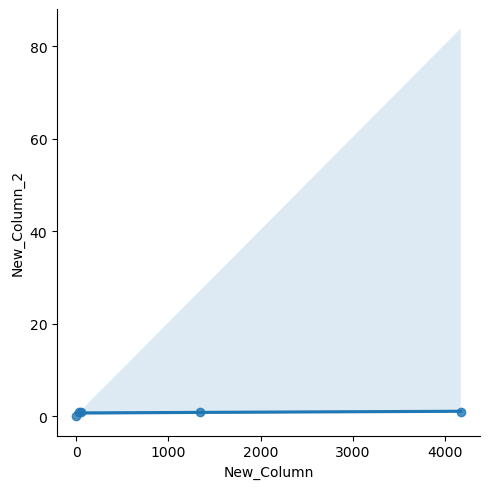

In [97]:
df['New_Column'] = np.concatenate((finale, np.zeros((1, 1))), axis=0)
df['New_Column_2'] = np.concatenate((theta, np.zeros((1, 1))), axis=0)
# رسم البيانات
sns.lmplot(x='New_Column', y='New_Column_2', data=df, fit_reg=True)
